In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from pylab import ylim, title, ylabel, xlabel
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter


#sns.set(style = "ticks", context= "talk")

In [22]:
hurricane_data = pd.read_csv("hurricanes.csv")

In [23]:
hurricane_data.drop_duplicates(subset=["longitude", "latitude", "time"], inplace=True, )

In [24]:
hurricane_data.head()

,tid,sid,latitude,longitude,time,wind,label
0,1374,1,28.4,-67.0,2005-09-05 18:00:00,30,LOW_INTENSITY
1,1374,1,28.4,-66.6,2005-09-06 00:00:00,35,LOW_INTENSITY
2,1374,1,28.5,-66.5,2005-09-06 06:00:00,40,LOW_INTENSITY
3,1374,1,28.5,-66.5,2005-09-06 12:00:00,50,LOW_INTENSITY
4,1374,1,28.6,-66.4,2005-09-06 18:00:00,50,LOW_INTENSITY


In [25]:
#setting up the structure of the data that
longitudes = np.array(hurricane_data['longitude'])
latitudes = np.array(hurricane_data['latitude'])

len(longitudes) == len(latitudes), len(latitudes)

(True, 1990)

In [26]:
#start preprocessing the longitude #How to use 
sigma_lo = np.std(longitudes); mean_lo = np.mean(longitudes)
sigma_lo, mean_lo

(20.935121768490596, -60.12482412060302)

Text(0.5, 1.0, 'Plotting the distribution of the longitude')

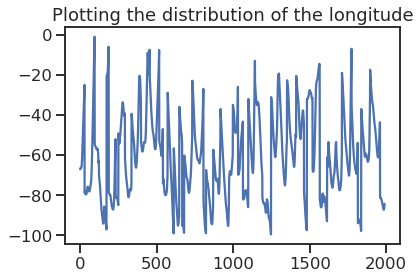

In [27]:
#plot the longitude
plt.plot(longitudes)
title("Plotting the distribution of the longitude")


In [28]:
#initializing the Kalman filte for longitudes and setting up the respective values
kf = KalmanFilter(1, 1)

kf.state_cov = np.array([sigma_lo]) #H
kf.design = np.array([1.0]) #Z
kf.transition = np.array([1.0]) #T
kf.selection = np.array([1.0])

kf.initialize_known(np.array([mean_lo]), np.array([[sigma_lo]]))
kf.bind(longitudes)

long_filtered = kf.filter().filtered_state[0]


In [29]:
len(long_filtered)

1990

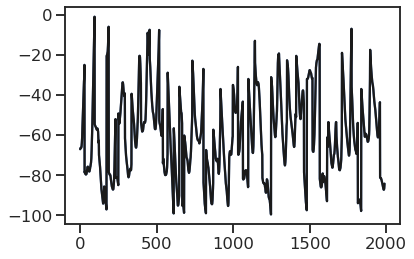

In [31]:
# Now to check if it is worth it 
plt.plot(longitudes, 'b')
plt.plot(long_filtered, 'k')long_filtered.filtered_state


In [34]:
#start preprocessing the longitude #How to use 
sigma_la = np.std(latitudes); mean_la = np.mean(latitudes)
sigma_la, mean_la

(11.076213033421592, 25.909095477386934)

Text(0.5, 1.0, 'Plotting the distribution of the latitude')

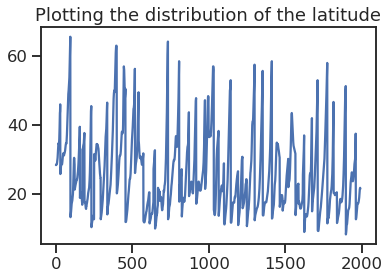

In [35]:
#plot the longitude
plt.plot(latitudes)
title("Plotting the distribution of the latitude")


In [36]:
#initializing the Kalman filte for longitudes and setting up the respective values
kf = KalmanFilter(1, 1)

kf.state_cov = np.array([sigma_la]) #H
kf.design = np.array([1.0]) #Z
kf.transition = np.array([1.0]) #T
kf.selection = np.array([1.0])

kf.initialize_known(np.array([mean_la]), np.array([[sigma_la]]))
kf.bind(latitudes)

lat_filtered = kf.filter().filtered_state[0]


In [ ]:
# Now to check if it is worth it 
plt.plot(latitudes, 'b')
plt.plot(long_filtered, 'k')long_filtered.filtered_state
